## **Zadanie 1 - Gradient Prosty**

Cel zadania polega na implementacji algorytmu gradientu prostego oraz zbadaniu jego zachowania dla różnych wartości wymienionych niżej hiperparametrów. Metodę należy zastosować dla następujących funkcji:
- $f(x) = x_1^2 + x_2^2$
- funkcja [Matyas](https://www.sfu.ca/~ssurjano/matya.html) (dla 2 wymiarów)

Kroki do wykonania:
1. Zaimplementuj algorytm gradientu prostego.
2. Zbadaj wpływ wartości parametru kroku na zbieżność metody - należy sporządzić wykres par (wartość funkcji celu, nr iteracji).
3. Dla ustalonej wartości parametru kroku zbadaj zachowanie algorytmu dla trzech wybranych punktów startowych. Wyniki przedstaw w postaci wizualnej.

**Uwagi:**
- Zaimplementowana metoda powinna być uniwersalna, tzn. działać dla dowolnej zadanej funkcji celu.
- Warunki stopu: maksymalna liczba iteracji, zbieżność gradientu.
- Gradient można liczyć z definicji, bądź też użyć np. modułu autograd.

In [127]:
import autograd.numpy as np
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Callable

In [113]:
# define constants
MIN_X = 10
MAX_X = 10
PLOT_STEP = 100

In [52]:
learning_rate = 0.1
max_iter = 10_000

In [91]:
def func(x: np.ndarray) -> float:
    return np.sum(x**2)

In [93]:
def func_df(x: np.ndarray) -> np.ndarray:
    return 2 * x

In [94]:
def matyas(x: np.ndarray) -> float:
    return 0.26 * (x[0]**2 + x[1]**2) - 0.48 * x[0] * x[1]

In [95]:
def matyas_df(x: np.ndarray) -> np.ndarray:
    return np.array([0.52*x[0] - 0.48*x[1], 0.52*x[1] - 0.48*x[0]])

In [114]:
def gradient_descent(
    grad_dfdx: Callable[[np.ndarray], np.ndarray],
    x: np.ndarray,
    learning_rate: float,
    max_iter: int,
    gradient_tolerance: float,
) -> List[np.ndarray]:
    """
    Calculate the gradient descent trajectory for a function.

    Parameters:
        grad_dfdx (Callable[[np.ndarray], np.ndarray]): Calculates the gradient of the function at a point.
        x (np.ndarray): The initial point.
        learning_rate (float): Step size for the gradient descent.
        max_iter (int): Maximum number of iterations.
        gradient_tolerance (float): Convergence criterion for the gradient.

    Returns:
        List[np.ndarray]: The trajectory of the gradient descent.
    """
    trajectory = [x.copy()]
    func_val = [func(x)]

    for _ in range(max_iter):
        dfdx = grad_dfdx(x)
        if np.linalg.norm(dfdx) < gradient_tolerance:
            break

        x -= learning_rate * dfdx
        trajectory.append(x.copy())
        func_val.append(func(x))
    return trajectory, func_val

In [115]:
func_trajectory, func_val = gradient_descent(
    func_df,
    np.array([3.0, 4.0]),
    learning_rate,
    max_iter,
    1e-6,
)

In [135]:
def get_meshgrid_input(min_x: float=MIN_X, max_x: float=MAX_X, step: int=PLOT_STEP) -> np.ndarray:
    x1 = np.linspace(-min_x, max_x, step)
    x2 = np.linspace(-min_x, max_x, step)
    X1, X2 = np.meshgrid(x1, x2)
    return X1, X2

In [143]:
def visualize_fun(obj_fun: Callable[[np.ndarray], float], trajectory: np.ndarray) -> None:
    min_point = trajectory[-1]
    min_x, min_y = min_point[0], min_point[1]

    X1, X2 = get_meshgrid_input()
    Z = np.apply_along_axis(obj_fun, 0, np.array([X1, X2]))

    plt.figure(figsize=(8, 6))
    plt.pcolormesh(X1, X2, Z, cmap='viridis', shading='auto')
    plt.colorbar(label='Objective Function Value')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Objective Function Visualization')

    plt.scatter(min_x, min_y, color='yellow', label='Minimum found by gradient descent alg.')
    plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', color='red', label='Gradient Descent Steps', alpha=0.5)

    plt.legend()
    plt.show()

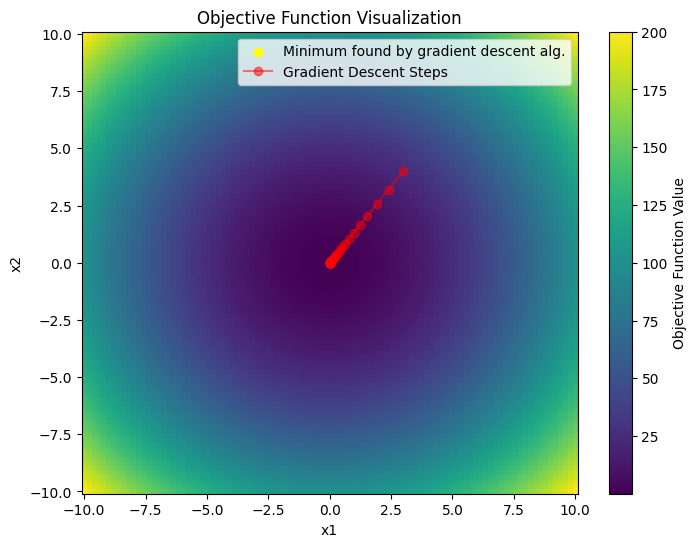

In [137]:
visualize_fun(func, np.array(func_trajectory))

In [142]:
def visualize_func_3d(obj_fun: Callable[[np.ndarray], float], trajectory: np.ndarray) -> None:
    # get the minimum point
    min_point = trajectory[-1]
    min_x, min_y = min_point[0], min_point[1]

    # calculate output for the objective function
    X1, X2 = get_meshgrid_input()
    Z = np.apply_along_axis(obj_fun, 0, np.array([X1, X2]))

    # plot the 3D surface
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Objective Function Value')
    ax.set_title('Objective Function Visualization')

    # plot the minimum point and the trajectory
    ax.scatter(min_x, min_y, func(np.array([min_x, min_y])), color='yellow', label='Minimum found by gradient descent alg.')
    ax.plot(trajectory[:, 0], trajectory[:, 1], np.array(func_val), marker='o', color='red', label='Gradient Descent Steps', alpha=0.5)

    plt.legend()
    plt.show()

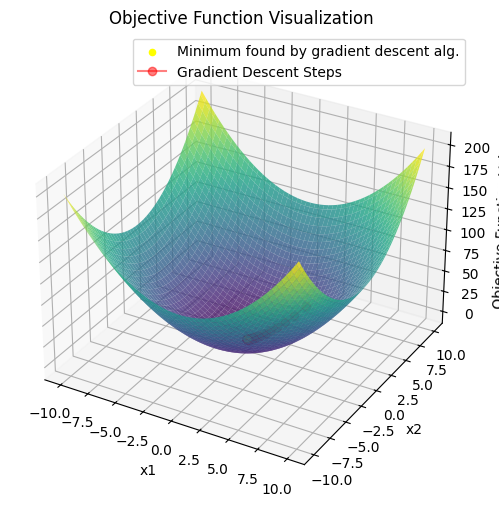

In [139]:
visualize_func_3d(func, np.array(func_trajectory))

In [144]:
def visualize_value_change(func_val: List[float]) -> None:
    plt.figure(figsize=(8, 6))
    plt.plot(func_val, marker='o', color='blue', label='Objective Function Value')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Function Value')
    plt.title('Objective Function Value Change')

    plt.legend()
    plt.show()

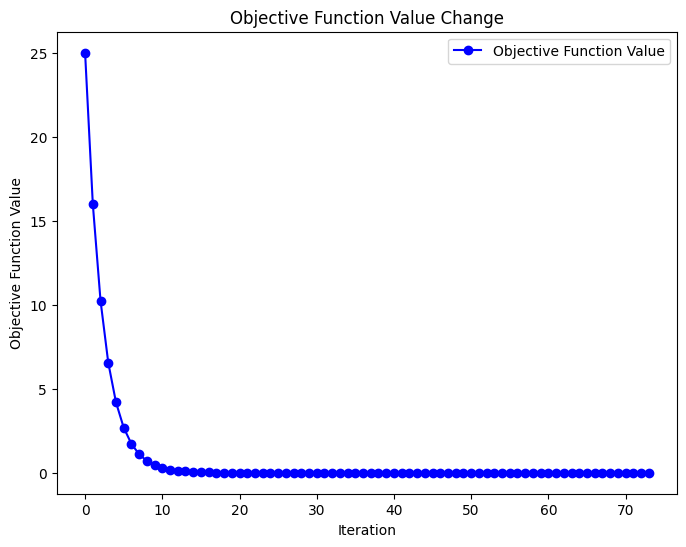

In [141]:
visualize_value_change(func_val)